# PREDICTION USING SUPERVISED LEARNING

## NAME: Shivam Panchal

In this task we will predict the score on the basis of study hours.

## Collection of data using Pandas 

In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Checking null values

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Visualizing the data

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

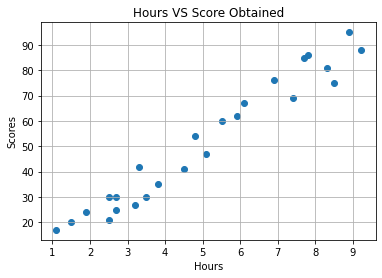

In [5]:
plt.scatter(df.Hours,df.Scores)
plt.title("Hours VS Score Obtained")
plt.grid()
plt.xlabel('Hours')
plt.ylabel("Scores");

## Spliting Data into Train set and Test set

In [6]:
y = df.Scores
X = df.drop("Scores",axis=1)  

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

## Fitting data into model (LinearRegression)

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

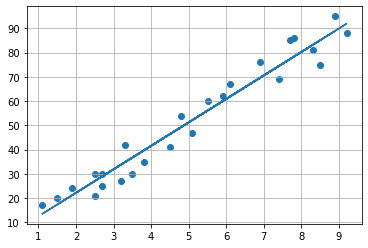

In [9]:
# Plotting the regression line
l = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, l)
plt.grid()
plt.show();

## Evaluating the model

In [10]:
model.score(X_test,y_test)

0.9678055545167994

**Mean absolute error (MAE)**

MAE is the average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your models predictions are.

In [11]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

3.9207511902099244

In [12]:
df = pd.DataFrame(data={"actual values":y_test,
                       "predicted values": y_preds})
df["differences"] =df["predicted values"]-df["actual values"]
df

,actual values,predicted values,differences
8,81,83.188141,2.188141
16,30,27.032088,-2.967912
0,21,27.032088,6.032088
23,76,69.633232,-6.366768
11,62,59.951153,-2.048847


## Predicting Score

In [13]:
hour_studied = 9.25
pred = model.predict([[hour_studied]])
print(f"No of Hours = {hour_studied}")
print(f"Predicted Score = {pred[0]}")

No of Hours = 9.25
Predicted Score = 92.38611528261494
